# Working with web maps and web scenes
[guide](https://developers.arcgis.com/python/guide/working-with-web-maps-and-web-scenes/)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Working-with-web-maps-and-web-scenes" data-toc-modified-id="Working-with-web-maps-and-web-scenes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Working with web maps and web scenes</a></span><ul class="toc-item"><li><span><a href="#Working-with-web-maps" data-toc-modified-id="Working-with-web-maps-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Working with web maps</a></span><ul class="toc-item"><li><span><a href="#Searching-for-web-maps" data-toc-modified-id="Searching-for-web-maps-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Searching for web maps</a></span></li><li><span><a href="#Creating-a-WebMap-object" data-toc-modified-id="Creating-a-WebMap-object-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Creating a <code>WebMap</code> object</a></span></li><li><span><a href="#Displaying-the-web-map" data-toc-modified-id="Displaying-the-web-map-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Displaying the web map</a></span></li><li><span><a href="#Removing-layers-from-a-web-map" data-toc-modified-id="Removing-layers-from-a-web-map-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Removing layers from a web map</a></span></li><li><span><a href="#Adding-layers-to-a-web-map" data-toc-modified-id="Adding-layers-to-a-web-map-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>Adding layers to a web map</a></span></li><li><span><a href="#Saving-or-Updating-a-web-map" data-toc-modified-id="Saving-or-Updating-a-web-map-1.1.6"><span class="toc-item-num">1.1.6&nbsp;&nbsp;</span>Saving or Updating a web map</a></span></li></ul></li><li><span><a href="#Working-with-web-scenes" data-toc-modified-id="Working-with-web-scenes-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Working with web scenes</a></span></li><li><span><a href="#Searching-for-web-scene-items" data-toc-modified-id="Searching-for-web-scene-items-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Searching for web scene items</a></span><ul class="toc-item"><li><span><a href="#Creating-a-WebScene-object" data-toc-modified-id="Creating-a-WebScene-object-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Creating a <code>WebScene</code> object</a></span></li><li><span><a href="#Displaying-the-web-scene" data-toc-modified-id="Displaying-the-web-scene-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Displaying the web scene</a></span></li><li><span><a href="#Updating-a-web-scene" data-toc-modified-id="Updating-a-web-scene-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Updating a web scene</a></span></li></ul></li></ul></li></ul></div>

An ArcGIS web map is an interactive display of geographic information through a composition of web layers, basemap and much more. A web scene is analogous to a web map but in the 3D space. To get and overview, visit the product documentation for [web maps](http://doc.arcgis.com/en/arcgis-online/reference/what-is-web-map.htm) and [web scenes](http://doc.arcgis.com/en/arcgis-online/reference/what-is-web-scene.htm).

Web maps and scenes are stored as items on your portal and their content is in JavaScript Object Notation (JSON), a text format that can easily be transferred, stored, and edited. In this guide we will observe how to work maps and scenes using the `arcgis.mapping` module.

## Working with web maps
2D maps in your GIS are stored as web map items. A web map contains a JSON defining the bookmarks, layers, their symbology, order and other cartographic information. If you are interested in learning more about this specification, refer to this [documentation](/web-map-specification/). In the `mapping` module, web maps are represented using a `WebMap` class. At version 1.3 of the Python API, the `WebMap` class has been enhanced with the ability to easily add, remove layers and a few other basic operations.

In [1]:
from IPython.display import display
import arcgis
from arcgis.gis import GIS

In [2]:
gis = GIS(url="http://www.arcgis.com", username="renemorenow")
#gis = GIS(url="http://www.arcgis.com", username="williamrenem")
#gis = GIS(url="http://www.arcgis.com", username="wmoreno_project_esri_co")

Enter password: ········


In [ ]:
gis = GIS(url='https://pythonapi.playground.esri.com/portal', username='arcgis_python', password='amazing_arcgis_123')

### Searching for web maps
We can search for web maps just like any other item:

In [15]:
webmap_search = gis.content.search("Ebola maps, title:Ebola treatment locations", item_type="Web Map", outside_org=True, max_items=100)
webmap_search

[<Item title:"Ebola_course_2015_choosing_suitable_location_of_givingpoints" type:Web Map owner:almessabi1234>,
 <Item title:"Capstone Assignment - Locating an Ebola Treatment Center" type:Web Map owner:courserian>,
 <Item title:"Monrovia, Liberia Ebola Outbreak Treatment Unit" type:Web Map owner:shill26>,
 <Item title:"Locating an Ebola Treatment Center - Coursera GEOINT course" type:Web Map owner:SPHSparkles>,
 <Item title:"Ebola treatment locations" type:Web Map owner:ariza_dev>,
 <Item title:"Locating an Ebola Treatment Center" type:Web Map owner:Alex_bo>,
 <Item title:"LOCATING AN EBOLA TREATMENT CENTER. Monrovia, Liberia" type:Web Map owner:Nuriah>,
 <Item title:"GEOINT_Locating an Ebola treatment Center" type:Web Map owner:diekang>]

Let us take a look at one of the web maps

<Item title:"Ebola treatment locations" type:Web Map owner:arcgis_python>
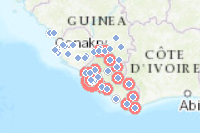

In [27]:
ebola_map_item = webmap_search[1]
ebola_map_item

<Item title:"Locating an Ebola Treatment Center" type:Web Map owner:Alex_bo>
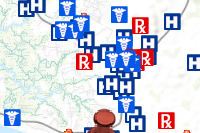

In [60]:
ebola_map_item = webmap_search[5]
ebola_map_item

### Creating a `WebMap` object
You can create an empty web map with a default basemap and no operational layers from the `WebMap` class:

In [74]:
from arcgis.mapping import WebMap
empty_webmap = WebMap()

In [75]:
empty_webmap.layers

[]

You can also create a `WebMap` object from an existing web map item by passing the web map item as the parameter to the constructor:

In [76]:
ebola_map = WebMap(ebola_map_item)

A typical web map consists of a few operational layers and one or more basemap layers. To view the operational layers, call the `layers` property:

In [77]:
for layer in ebola_map.layers:
    print(layer.title)

Possible Clinic Sites
Liberia_Medical_Facilities - Medical Facilities
WWHG_Health_Facilities_Liberia - Liberia Health Facilities (WWHGD)
WWHG_Demographics_Liberia - Liberia Population Density (WWHGD)
Liberia_Transportation_Points
Liberia_Internet_Cafes
Active organizations doing Ebola-related work
Liberia_Water_Resource_Areas - Liberia Hydrology Polygons
monrovia_roads
WWHG_Police_StationsLiberia


Similarly, you can find what basemap is used in this web map by querying the `baseMap` property:

In [78]:
ebola_map.basemap

{
  "baseMapLayers": [
    {
      "id": "defaultBasemap",
      "layerType": "ArcGISTiledMapServiceLayer",
      "opacity": 1,
      "visibility": true,
      "url": "http://services.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer"
    }
  ],
  "title": "Topographic"
}

At any time, you can get the full definition of the web map by calling the `definition` property:

In [79]:
ebola_map.definition.spatialReference

{
  "wkid": 102100,
  "latestWkid": 3857
}

You can also cast the `definition` into a Python `dictionary` and print out the keys:

In [80]:
dict(ebola_map.definition).keys()

dict_keys(['operationalLayers', 'baseMap', 'spatialReference', 'version', 'runningAnalysisJobs'])

### Displaying the web map
When using the Jupyter notebook environment, a `WebMap` object can be easily visualized by simply querying it. A map widget loads up and the map is rendered:

In [81]:
ebola_map

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'))

![img: ebola webmap](http://esri.github.io/arcgis-python-api/notebooks/nbimages/guide_mapping_webmaps_01.png)

### Removing layers from a web map
You can update a web map by adding or removing layers. For instance, the cell below removes one of the layers from the web map and adds a different layer.

In [70]:
# remove the first - unclassed layer from the map
ebola_map.remove_layer(ebola_map.layers[0])

### Adding layers to a web map
To add new layers, call the `add_layer()` method. You can layer objects such as `FeatureLayer`, `ImageryLayer`, `FeatureCollection` objects and also `Item` objects. When adding a layer to the web map you can specify options such as title, custom symbols, visibility, opaticy etc. The code below adds a feature layer collection item to the web map.

In [73]:
liberia_item = gis.content.get('62ca1e37f0a34f1898c0902d9110fd21')
ebola_map.add_layer(liberia_item, options={'title':'Liberia facilities and hospitals'})
ebola_map

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'))

### Saving or Updating a web map
To save a web map, simply call the `save()` method. Similarly, if you created the `WebMap` object from an existing web map item, then you can call the `update()` method to update it. 

Note, `save()` method always creates a new item with updated web map definition, so if you want to create a copy of an existing web map, this is a great way. For instance, the cell below calls the `save()` method and creates a new web map item with the new set of layers without disturbing the original Ebola web map item.

<Item title:"Ebola incidents and facilities" type:Web Map owner:arcgis_python>
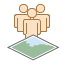

In [44]:
webmap_item_properties = {'title':'Ebola incidents and facilities',
                         'snippet':'Map created using Python API showing locations of Ebola treatment centers',
                         'tags':['automation', 'ebola', 'world health', 'python']}

ebola_map.save(webmap_item_properties, thumbnail='./webmap_thumbnail.png')

## Working with web scenes
In your GIS, 3D maps are stored as web scene items. Similar to web maps, web scenes contain the definition of the layers, their cartography in JSON. In the `mapping` module, a web scene is represented using a `WebScene` object.

You can search for a web scene similar to any other item:

## Searching for web scene items

In [84]:
webscene_search = gis.content.search("Toprical Cyclones - Summer", item_type="Web Scene", outside_org=True)
webscene_search

[<Item title:"Toprical Cyclones - Summer" type:Web Scene owner:demo_deldev>,
 <Item title:"Toprical Cyclones - Summer" type:Web Scene owner:demo_deldev>,
 <Item title:"Toprical Cyclones - Summer" type:Web Scene owner:demo_deldev>,
 <Item title:"Toprical Cyclones - Summer" type:Web Scene owner:demo_deldev>,
 <Item title:"Toprical Cyclones - Summer" type:Web Scene owner:demo_deldev>]

Let us access the first web scene from this list.

In [85]:
webscene_item = webscene_search[0]
webscene_item

<Item title:"Toprical Cyclones - Summer" type:Web Scene owner:demo_deldev>

### Creating a `WebScene` object
You can create a `WebScene` object using the constructor and passing the web scene item as the parameter:

In [86]:
from arcgis.mapping import WebScene
webscene_obj = WebScene(webscene_item)

The `WebScene` object provides a dictionary representation of the information contained in the web scene. For instance, you can view the list of layers in this web map by querying the operationalLayers key.

In [87]:
webscene_obj['operationalLayers']

[{'listMode': 'hide-children',
  'layers': [{'title': 'Labels Q2',
    'visibility': False,
    'id': '56803f3d64184140950f0ef1256a0603',
    'layerDefinition': {'drawingInfo': {'renderer': {'symbol': {'name': 'Pushpin 1',
        'styleName': 'EsriIconsStyle',
        'type': 'styleSymbolReference'},
       'visualVariables': [{'valueUnit': 'unknown',
         'axis': 'all',
         'minSize': 25,
         'type': 'sizeInfo'}],
       'label': '',
       'description': '',
       'type': 'simple'}},
     'elevationInfo': {'mode': 'absoluteHeight'}},
    'layerType': 'ArcGISFeatureLayer',
    'opacity': 1,
    'url': 'http://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/PacificTyphoons2005_WFL/FeatureServer/5',
    'showLabels': True},
   {'title': 'Typhoons Q2',
    'id': '72668fcc8a904bd6a1444bef2e72f420',
    'layerDefinition': {'drawingInfo': {'renderer': {'symbol': {'name': 'Standing Cylinder',
        'styleName': 'EsriThematicShapesStyle',
        'type': 'styleSymb

Similar to a `WebMap` seen earlier, you can find the list of all keys that you can query for by calling the keys() function:

In [88]:
webscene_obj.keys()

odict_keys(['operationalLayers', 'authoringAppVersion', 'presentation', 'authoringApp', 'version', 'initialState', 'baseMap'])

### Displaying the web scene
When using the Jupyter notebook environment, a `WebScene` object can be easily visualized by simply querying it. A map widget loads up and the scene is rendered:

In [89]:
webscene_obj

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'), mode='3D')

![tropical cyclones web scene](http://esri.github.io/arcgis-python-api/notebooks/nbimages/05_Using_updating_GIS_06.PNG)

### Updating a web scene
The `WebScene` object provides an `update()` method that allows you to modify a web scene and save those changes back. To update a web scene, you modify its definition by changing the adding, removing or changing the values of its keys and then call the update() method. Refer to the sample notebook on [using and updating a web scene](https://developers.arcgis.com/python/sample-notebooks/using-and-updating-gis-content/#Using-and-updating-a-web-scene) for an example.